# 1. Importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 2. Loading the dataset

In [2]:
# link: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset
df = pd.read_csv("dataset/breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# 3. Train/test splitting and normalization

In [4]:
df_columns = list(df.columns)
df_columns.remove('diagnosis')
df_columns.remove('id')
features = df_columns
print(features)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [5]:
X = df[features]
y = df['diagnosis']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# 4. Accuracy report function

In [6]:
def accuracy_report(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    acc_report = {}
    labels = np.unique(y_test)
    AA = 0
    for label in labels:
        per_class_acc = cm[label,label]/np.sum(cm[label,:]) * 100
        acc_report["class " + str(label)] = per_class_acc
        AA+=per_class_acc
    AA = AA/len(labels)
    acc_report["OA"] = accuracy_score(y_test, y_pred)*100
    acc_report["AA"] = AA
    
    return acc_report

# 5. SVM Classification

## 5.1. SVM with Polynomial Kernel

### 5.1.1. Cross-validation Grid Search

#### a. Wide parameters search

In [7]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'degree': [1, 2, 4, 8, 16, 32],
              'kernel': ['poly']} 
  
grid = GridSearchCV(SVC(), param_grid)
  
# fitting the model for grid search
search_results = grid.fit(X_train, y_train)

In [8]:
print("Best params", search_results.best_params_)
print("Best CV score", "{:.4f}".format(search_results.best_score_*100), "%")

Best params {'C': 1, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
Best CV score 97.4873 %


#### b. Refined parameters search

In [9]:
# defining parameter range
param_grid = {'C': np.arange(1,10,1), 
              'gamma': np.arange(0.1,1.1,0.1),
              'degree': [2,3],
              'kernel': ['poly']} 
  
grid = GridSearchCV(SVC(), param_grid)
  
# fitting the model for grid search
search_results = grid.fit(X_train, y_train)

print("Best params", search_results.best_params_)
print("Best CV score", "{:.4f}".format(search_results.best_score_*100), "%")

Best params {'C': 1, 'degree': 2, 'gamma': 1.0, 'kernel': 'poly'}
Best CV score 97.4873 %


### 5.1.2. Classification

In [10]:
C = search_results.best_params_['C'] 
gamma = search_results.best_params_['gamma']
degree = search_results.best_params_['degree']


svm = SVC(kernel='poly', C=C, gamma=gamma, degree=degree)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
acc_report = accuracy_report(y_test, y_pred)

for key in acc_report:
    print(key, " = ", "{:.2f}".format(acc_report[key]), " %")

class 0  =  99.13  %
class 1  =  98.21  %
OA  =  98.83  %
AA  =  98.67  %


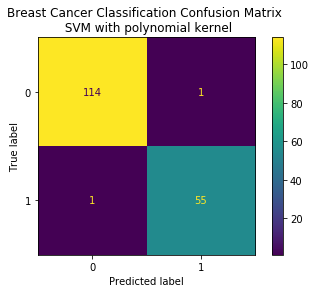

In [11]:
cm = confusion_matrix(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm.classes_)
disp.plot()
plt.title("Breast Cancer Classification Confusion Matrix \n SVM with polynomial kernel")
plt.show()

## 5.2. SVM with RBF Kernel

### 5.2.1. Cross-validation Grid Search

#### a. Wide parameters search

In [12]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid)
  
# fitting the model for grid search
search_results = grid.fit(X_train, y_train)

In [13]:
print("Best params", search_results.best_params_)
print("Best CV score", "{:.4f}".format(search_results.best_score_*100), "%")

Best params {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best CV score 96.9905 %


#### b. Refined parameters search

In [14]:
try_idx=0
gridsearch_results = []

In [15]:
# defining parameter range
param_grid = {'C': np.arange(12,14,0.1), # (5,100,5) # (10,20,1)
              'gamma': np.arange(0.96,0.98,0.001), # (0.1,10,0.1) # (0.8,1,0.01)
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid)
  
# fitting the model for grid search
search_results = grid.fit(X_train, y_train)

gridsearch_results.append({
    "Best params": search_results.best_params_,
    "Best CV score": "{:.4f}".format(search_results.best_score_*100)+ "%",
})

try_idx+=1

for idx in range(try_idx):
    print("try ", idx, " :")
    for elt in gridsearch_results[idx]:
        print("  ", elt, " : ", gridsearch_results[idx][elt])
    print("_________________________________________________________________")

try  0  :
   Best params  :  {'C': 12.599999999999998, 'gamma': 0.973, 'kernel': 'rbf'}
   Best CV score  :  97.2437%
_________________________________________________________________


### 5.2.2. Classification

In [16]:
C = search_results.best_params_['C'] 
gamma = search_results.best_params_['gamma']

svm = SVC(kernel='rbf', C=C, gamma=gamma)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
acc_report = accuracy_report(y_test, y_pred)

for key in acc_report:
    print(key, " = ", "{:.2f}".format(acc_report[key]), " %")

class 0  =  99.13  %
class 1  =  98.21  %
OA  =  98.83  %
AA  =  98.67  %


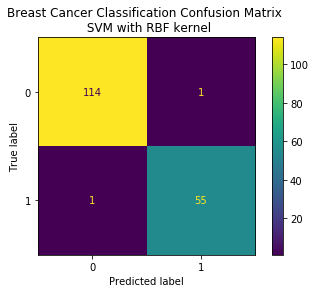

In [17]:
cm = confusion_matrix(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm.classes_)
disp.plot()
plt.title("Breast Cancer Classification Confusion Matrix \n SVM with RBF kernel")
plt.show()